# Выпускная квалификационная работа по курсу «Data Science»

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

### Загрузка датасетов

In [2]:
x_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
x_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)

In [3]:
x_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [4]:
x_bp.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1023.000000              1023.000000  
mean                     2466.922843               218.423144  
std                       485.628006                59.735931  
min                      1036.856605                33.803026  
25%                      2135.850448               179.627520  
50%                      2459.524526               219.198882  
75%                      2767.193119               257.481724  
max                      3848.436732               414.590628

In [5]:
x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [6]:
x_nup.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
count          1040.00000  1040.000000        1040.000000
mean             45.00000     6.911385          57.248399
std              45.02165     2.555181          12.332438
min               0.00000     0.000000           0.000000
25%               0.00000     5.102256          49.970740
50%              45.00000     6.938000          57.413594
75%              90.00000     8.587662          65.107235
max              90.00000    14.440522         103.988901

In [7]:
x_bp.shape

(1023, 10)

In [8]:
x_nup.shape

(1040, 3)

### Объединение файлов х_bp и х_nup по индексу, тип объединения INNER

In [9]:
#df = pd.concat([x_bp, x_nup], join="inner", axis=1)
df = x_bp.join(x_nup)

In [10]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [11]:
# Сброс ограничений на количество выводимых рядов
#pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
#pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
#pd.set_option('display.max_colwidth', None)

In [12]:
#df

In [13]:
#df.to_excel('df.xlsx')

### Разведочный анализ данных

In [14]:
df.shape

(1023, 13)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [16]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

#### Проверка на пустые значения

In [17]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

#### Проверка на дубликаты

In [18]:
df.duplicated().sum()

0

#### Количество уникальных значений

In [19]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

### Переименование колонок для лучшей читабельности и восприятия

In [51]:
df = df.rename(columns={"Соотношение матрица-наполнитель": "Target3: Соотношение матрица-наполнитель",
                        "Плотность, кг/м3": "Плотность",
                        "модуль упругости, ГПа": "Модуль упругости",
                        "Количество отвердителя, м.%": "Количество отвердителя",
                        "Содержание эпоксидных групп,%_2": "Содержание эпоксидных групп",
                        "Температура вспышки, С_2": "Температура вспышки",
                        "Поверхностная плотность, г/м2": "Поверхностная плотность",
                        "Модуль упругости при растяжении, ГПа": "Target1: Модуль упругости при растяжении",
                        "Прочность при растяжении, МПа": "Target2: Прочность при растяжении",
                        "Потребление смолы, г/м2": "Потребление смолы",
                        "Угол нашивки, град": "Угол нашивки"})

### Корреляция

In [52]:
df.corr()

Target3: Соотношение матрица-наполнитель  \
Target3: Соотношение матрица-наполнитель                                  1.000000   
Плотность                                                                 0.003841   
Модуль упругости                                                          0.031700   
Количество отвердителя                                                   -0.006445   
Содержание эпоксидных                                                     0.019766   
Температура вспышки                                                      -0.004776   
Поверхностная плотность                                                  -0.006272   
Target1: Модуль упругости при растяжении                                 -0.008411   
Target2: Прочность при растяжении                                         0.024148   
Потребление смолы                                                         0.072531   
Угол нашивки                                                             -0.031073   
Шаг нашивки                                                               0.036437   
Плотность нашивки                                                        -0.004652   

                                          Плотность  Модуль упругости  \
Target3: Соотношение матрица-наполнитель   0.003841          0.031700   
Плотность                                  1.000000         -0.009647   
Модуль упругости                          -0.009647          1.000000   
Количество отвердителя                    -0.035911          0.024049   
Содержание эпоксидных                     -0.008278         -0.006804   
Температура вспышки                       -0.020695          0.031174   
Поверхностная плотность                    0.044930         -0.005306   
Target1: Модуль упругости при растяжении  -0.017602          0.023267   
Target2: Прочность при растяжении         -0.069981          0.041868   
Потребление смолы                         -0.015937          0.001840   
Угол нашивки                              -0.068474         -0.025417   
Шаг нашивки                               -0.061015         -0.009875   
Плотность нашивки                          0.080304          0.056346   

                                          Количество отвердителя  \
Target3: Соотношение матрица-наполнитель               -0.006445   
Плотность                                              -0.035911   
Модуль упругости                                        0.024049   
Количество отвердителя                                  1.000000   
Содержание эпоксидных                                  -0.000684   
Температура вспышки                                     0.095193   
Поверхностная плотность                                 0.055198   
Target1: Модуль упругости при растяжении               -0.065929   
Target2: Прочность при растяжении                      -0.075375   
Потребление смолы                                       0.007446   
Угол нашивки                                            0.038570   
Шаг нашивки                                             0.014887   
Плотность нашивки                                       0.017248   

                                          Содержание эпоксидных  \
Target3: Соотношение матрица-наполнитель               0.019766   
Плотность                                             -0.008278   
Модуль упругости                                      -0.006804   
Количество отвердителя                                -0.000684   
Содержание эпоксидных                                  1.000000   
Температура вспышки                                   -0.009769   
Поверхностная плотность                               -0.012940   
Target1: Модуль упругости при растяжении               0.056828   
Target2: Прочность при растяжении                     -0.023899   
Потребление смолы                                      0.015165   
Угол нашивки                                           0.008052   
Шаг нашивки                                            0.

In [58]:
#df.corr().round(2) вСЕ ТАКИ СДЕЛАТЬ СИММЕТРИЧНОЙ?

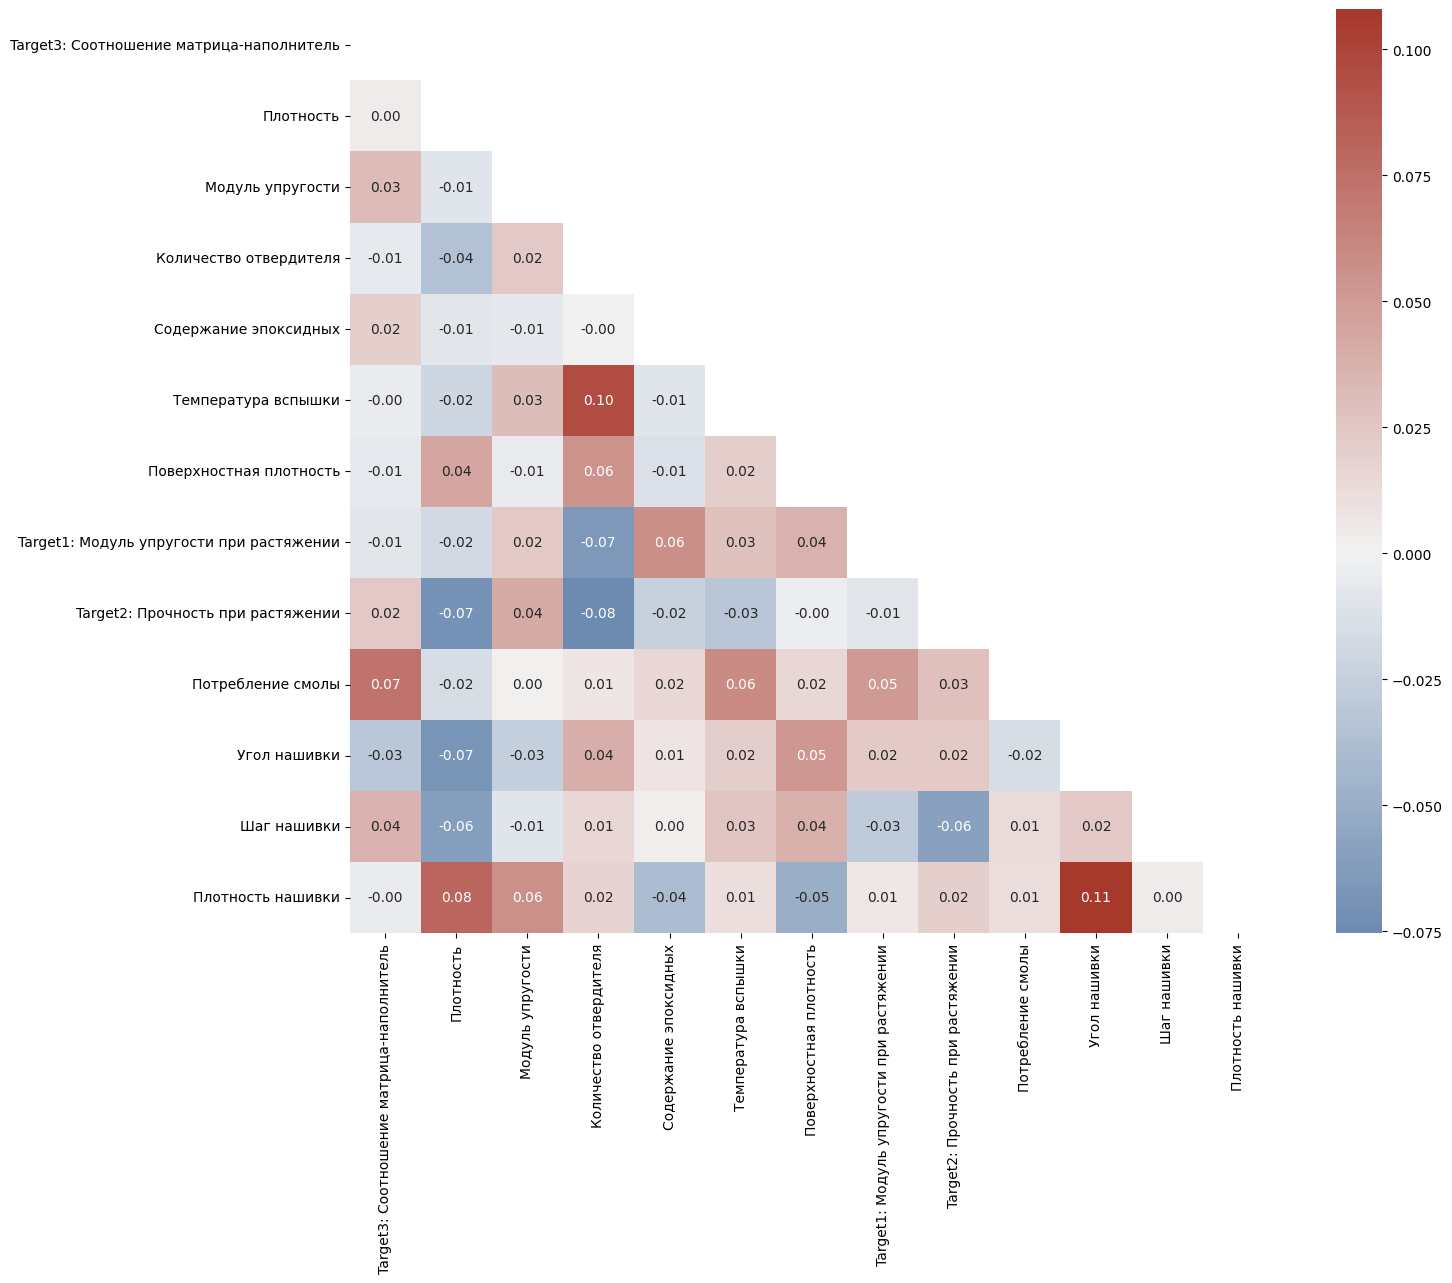

In [74]:
#corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')
#sns.heatmap(df.corr(), annot = True, fmt='.1g')

# Calculate pairwise-correlation
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

#cor_map = df.corr()
#fig, ax = plt.subplots(figsize=(14, 10))
#sns.heatmap(cor_map, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
#plt.show()

In [60]:
df.corr()['Target1: Модуль упругости при растяжении'].sort_values()

Количество отвердителя                     -0.065929
Шаг нашивки                                -0.029468
Плотность                                  -0.017602
Target2: Прочность при растяжении          -0.009009
Target3: Соотношение матрица-наполнитель   -0.008411
Плотность нашивки                           0.006476
Угол нашивки                                0.023003
Модуль упругости                            0.023267
Температура вспышки                         0.028414
Поверхностная плотность                     0.036702
Потребление смолы                           0.050938
Содержание эпоксидных                       0.056828
Target1: Модуль упругости при растяжении    1.000000
Name: Target1: Модуль упругости при растяжении, dtype: float64

In [61]:
df.corr()['Target2: Прочность при растяжении'].sort_values()

Количество отвердителя                     -0.075375
Плотность                                  -0.069981
Шаг нашивки                                -0.059547
Температура вспышки                        -0.031763
Содержание эпоксидных                      -0.023899
Target1: Модуль упругости при растяжении   -0.009009
Поверхностная плотность                    -0.003210
Плотность нашивки                           0.019604
Угол нашивки                                0.023398
Target3: Соотношение матрица-наполнитель    0.024148
Потребление смолы                           0.028602
Модуль упругости                            0.041868
Target2: Прочность при растяжении           1.000000
Name: Target2: Прочность при растяжении, dtype: float64

In [62]:
df.corr()['Target3: Соотношение матрица-наполнитель'].sort_values()

Угол нашивки                               -0.031073
Target1: Модуль упругости при растяжении   -0.008411
Количество отвердителя                     -0.006445
Поверхностная плотность                    -0.006272
Температура вспышки                        -0.004776
Плотность нашивки                          -0.004652
Плотность                                   0.003841
Содержание эпоксидных                       0.019766
Target2: Прочность при растяжении           0.024148
Модуль упругости                            0.031700
Шаг нашивки                                 0.036437
Потребление смолы                           0.072531
Target3: Соотношение матрица-наполнитель    1.000000
Name: Target3: Соотношение матрица-наполнитель, dtype: float64

ВЫВОДЫ:У ЦП 1 сильная прямая взаимосвязь с Содержанием эпоксидных групп, обратная связь с Количеством отвердителя.
У ЦП 2 наиболее сильная связь тоже с Модулем упругости, обратная тоже с Количеством отвердителя.
У ЦП 3 наиболее сильная тоже с Потреблением смолы, обратная с Углом нашивки.

### Гистограммы и графики распределения

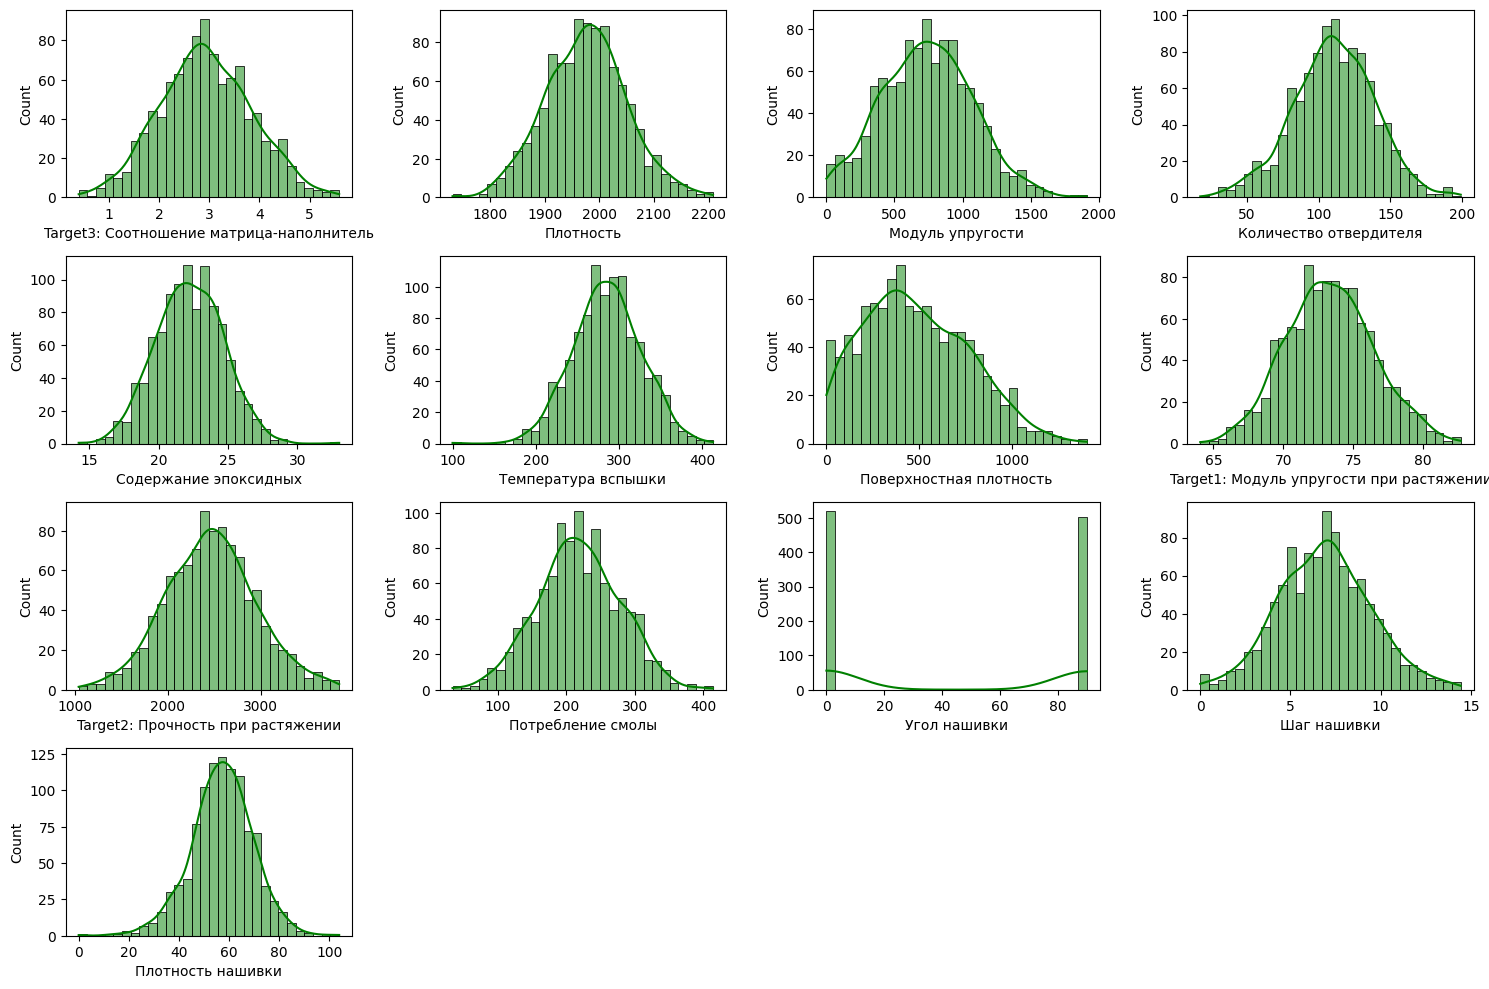

In [63]:
#from matplotlib.colorbar import colorbar_factory 
def histodraw(join_dataFrame, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=join_dataFrame, x=var_name, kde=True, bins=30, color = 'green')
    fig.tight_layout()
    plt.show()

histodraw(df, df.columns, 4, 4)
    

 ## Попарные графики рассеяния

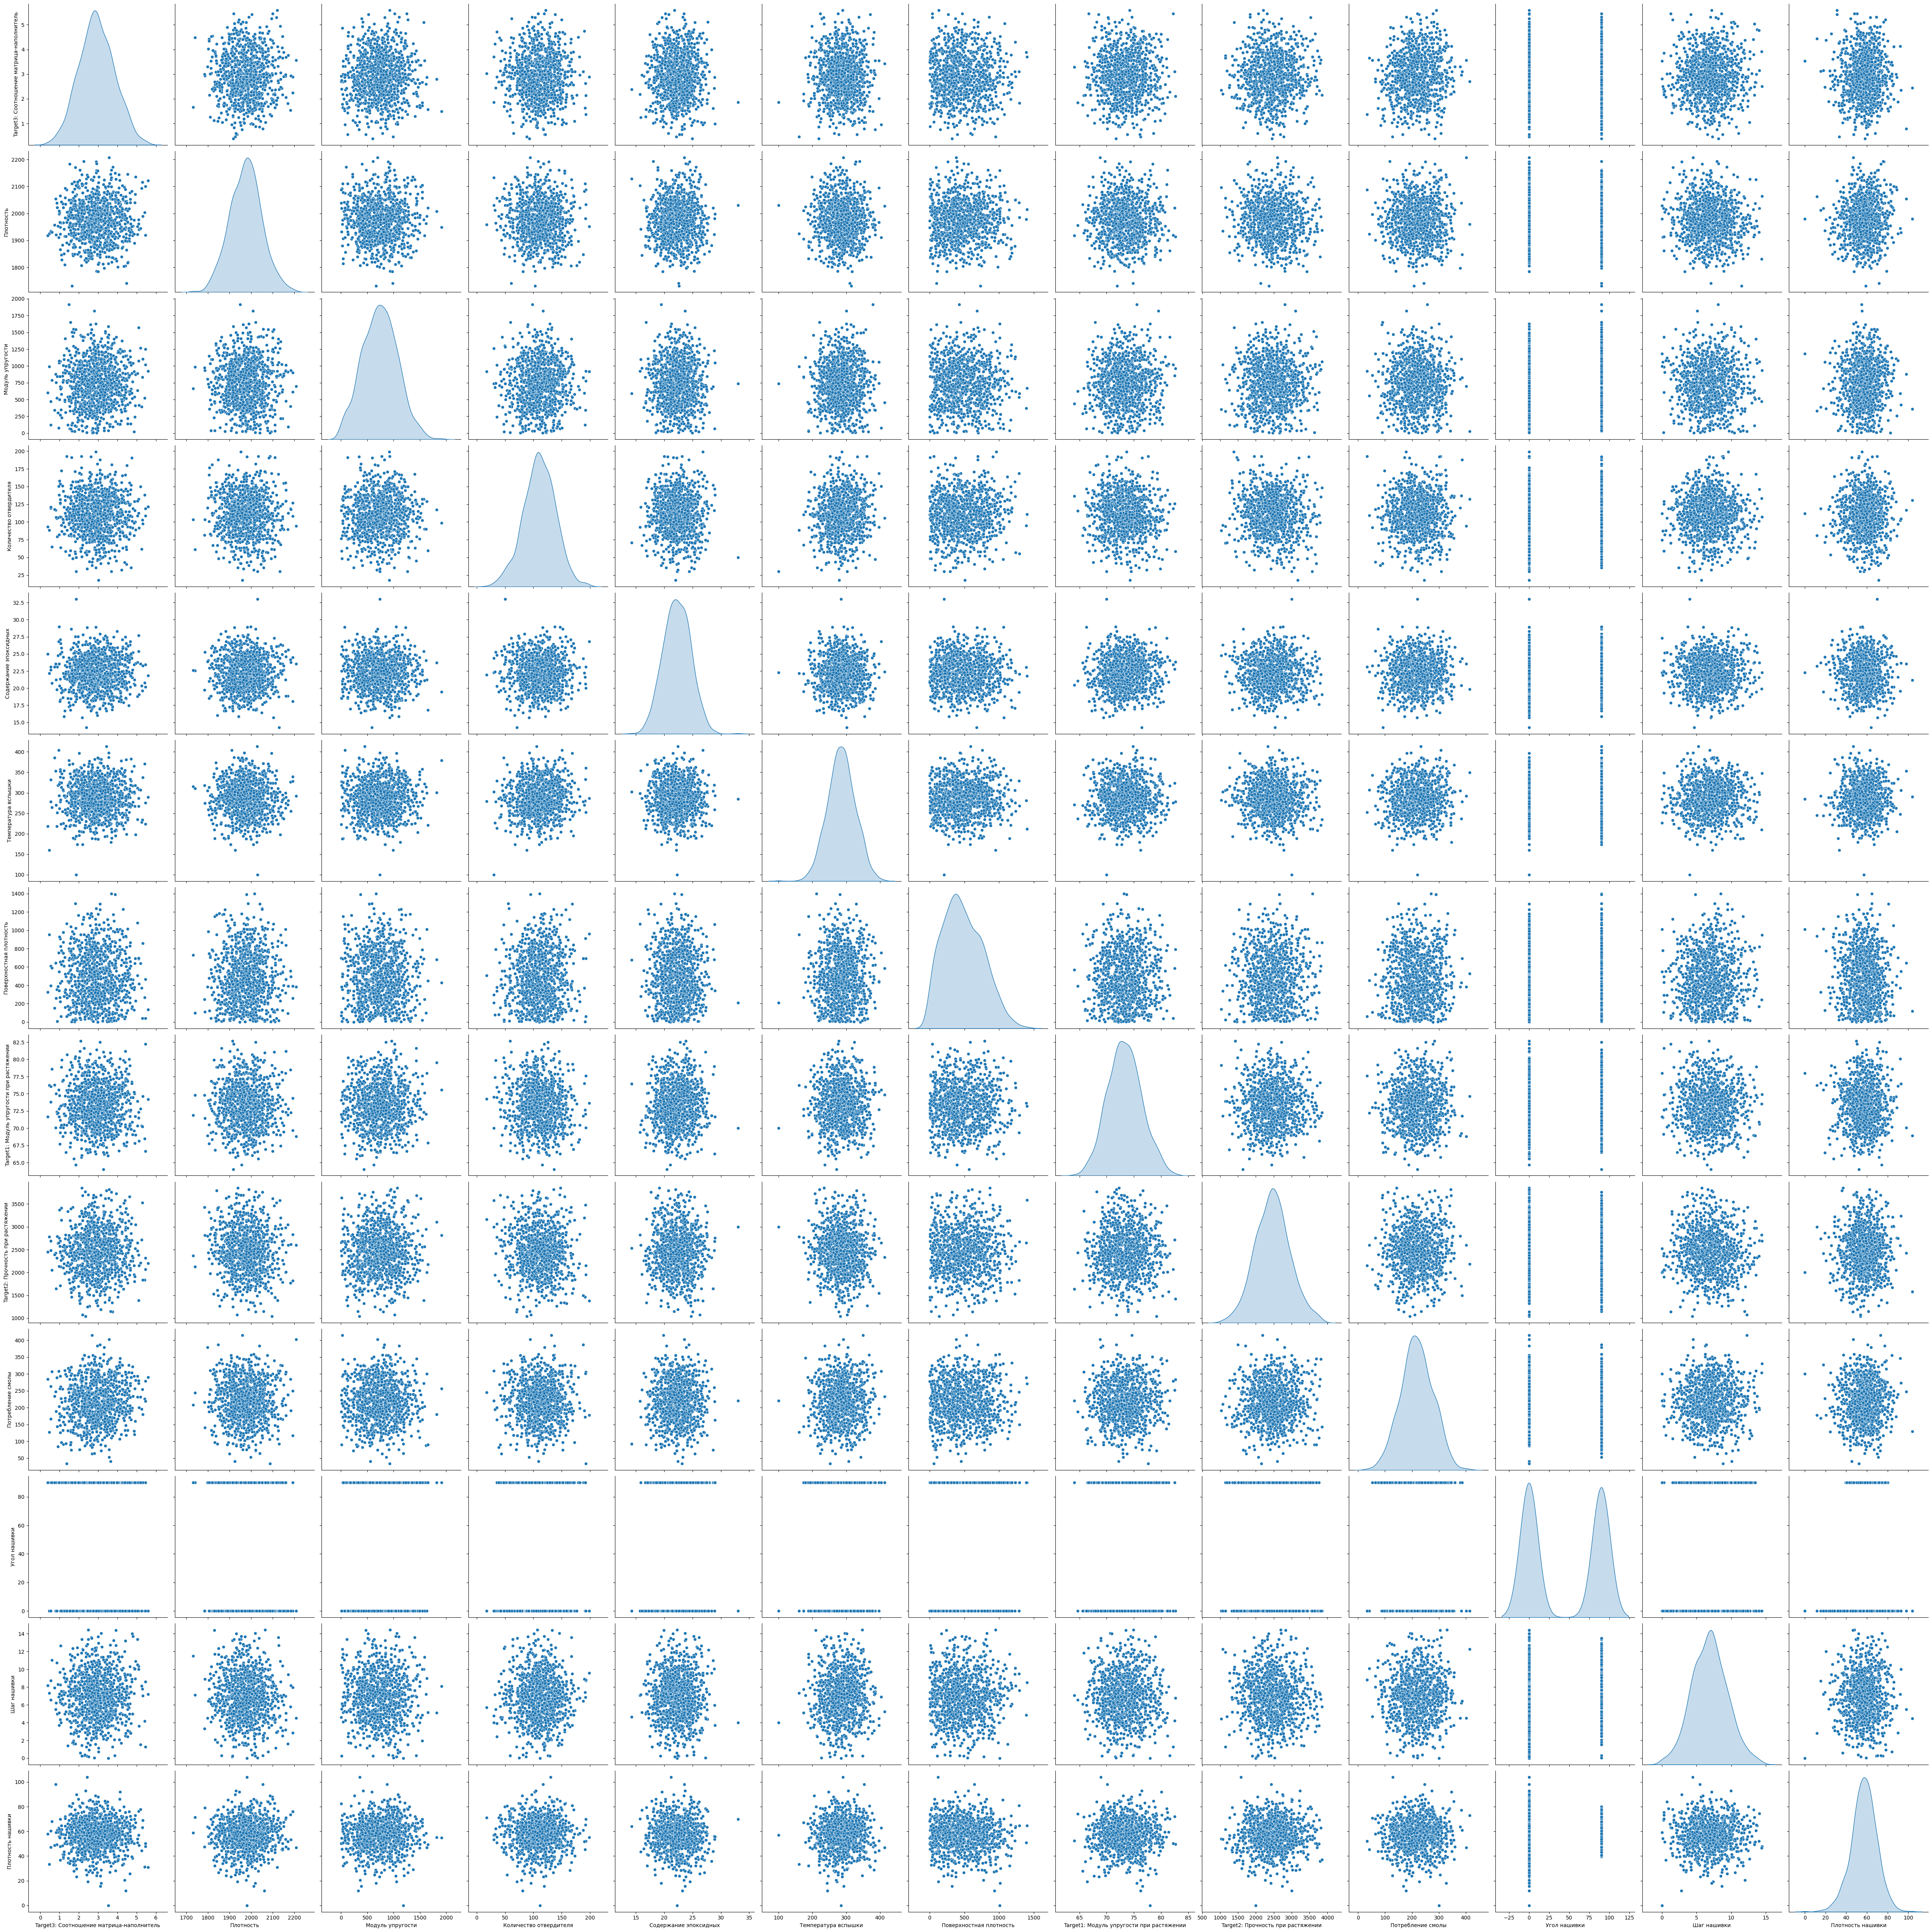

In [64]:
sns.pairplot(df, height=4, diag_kind='kde');

 ## Диаграммы "Ящик с усами"

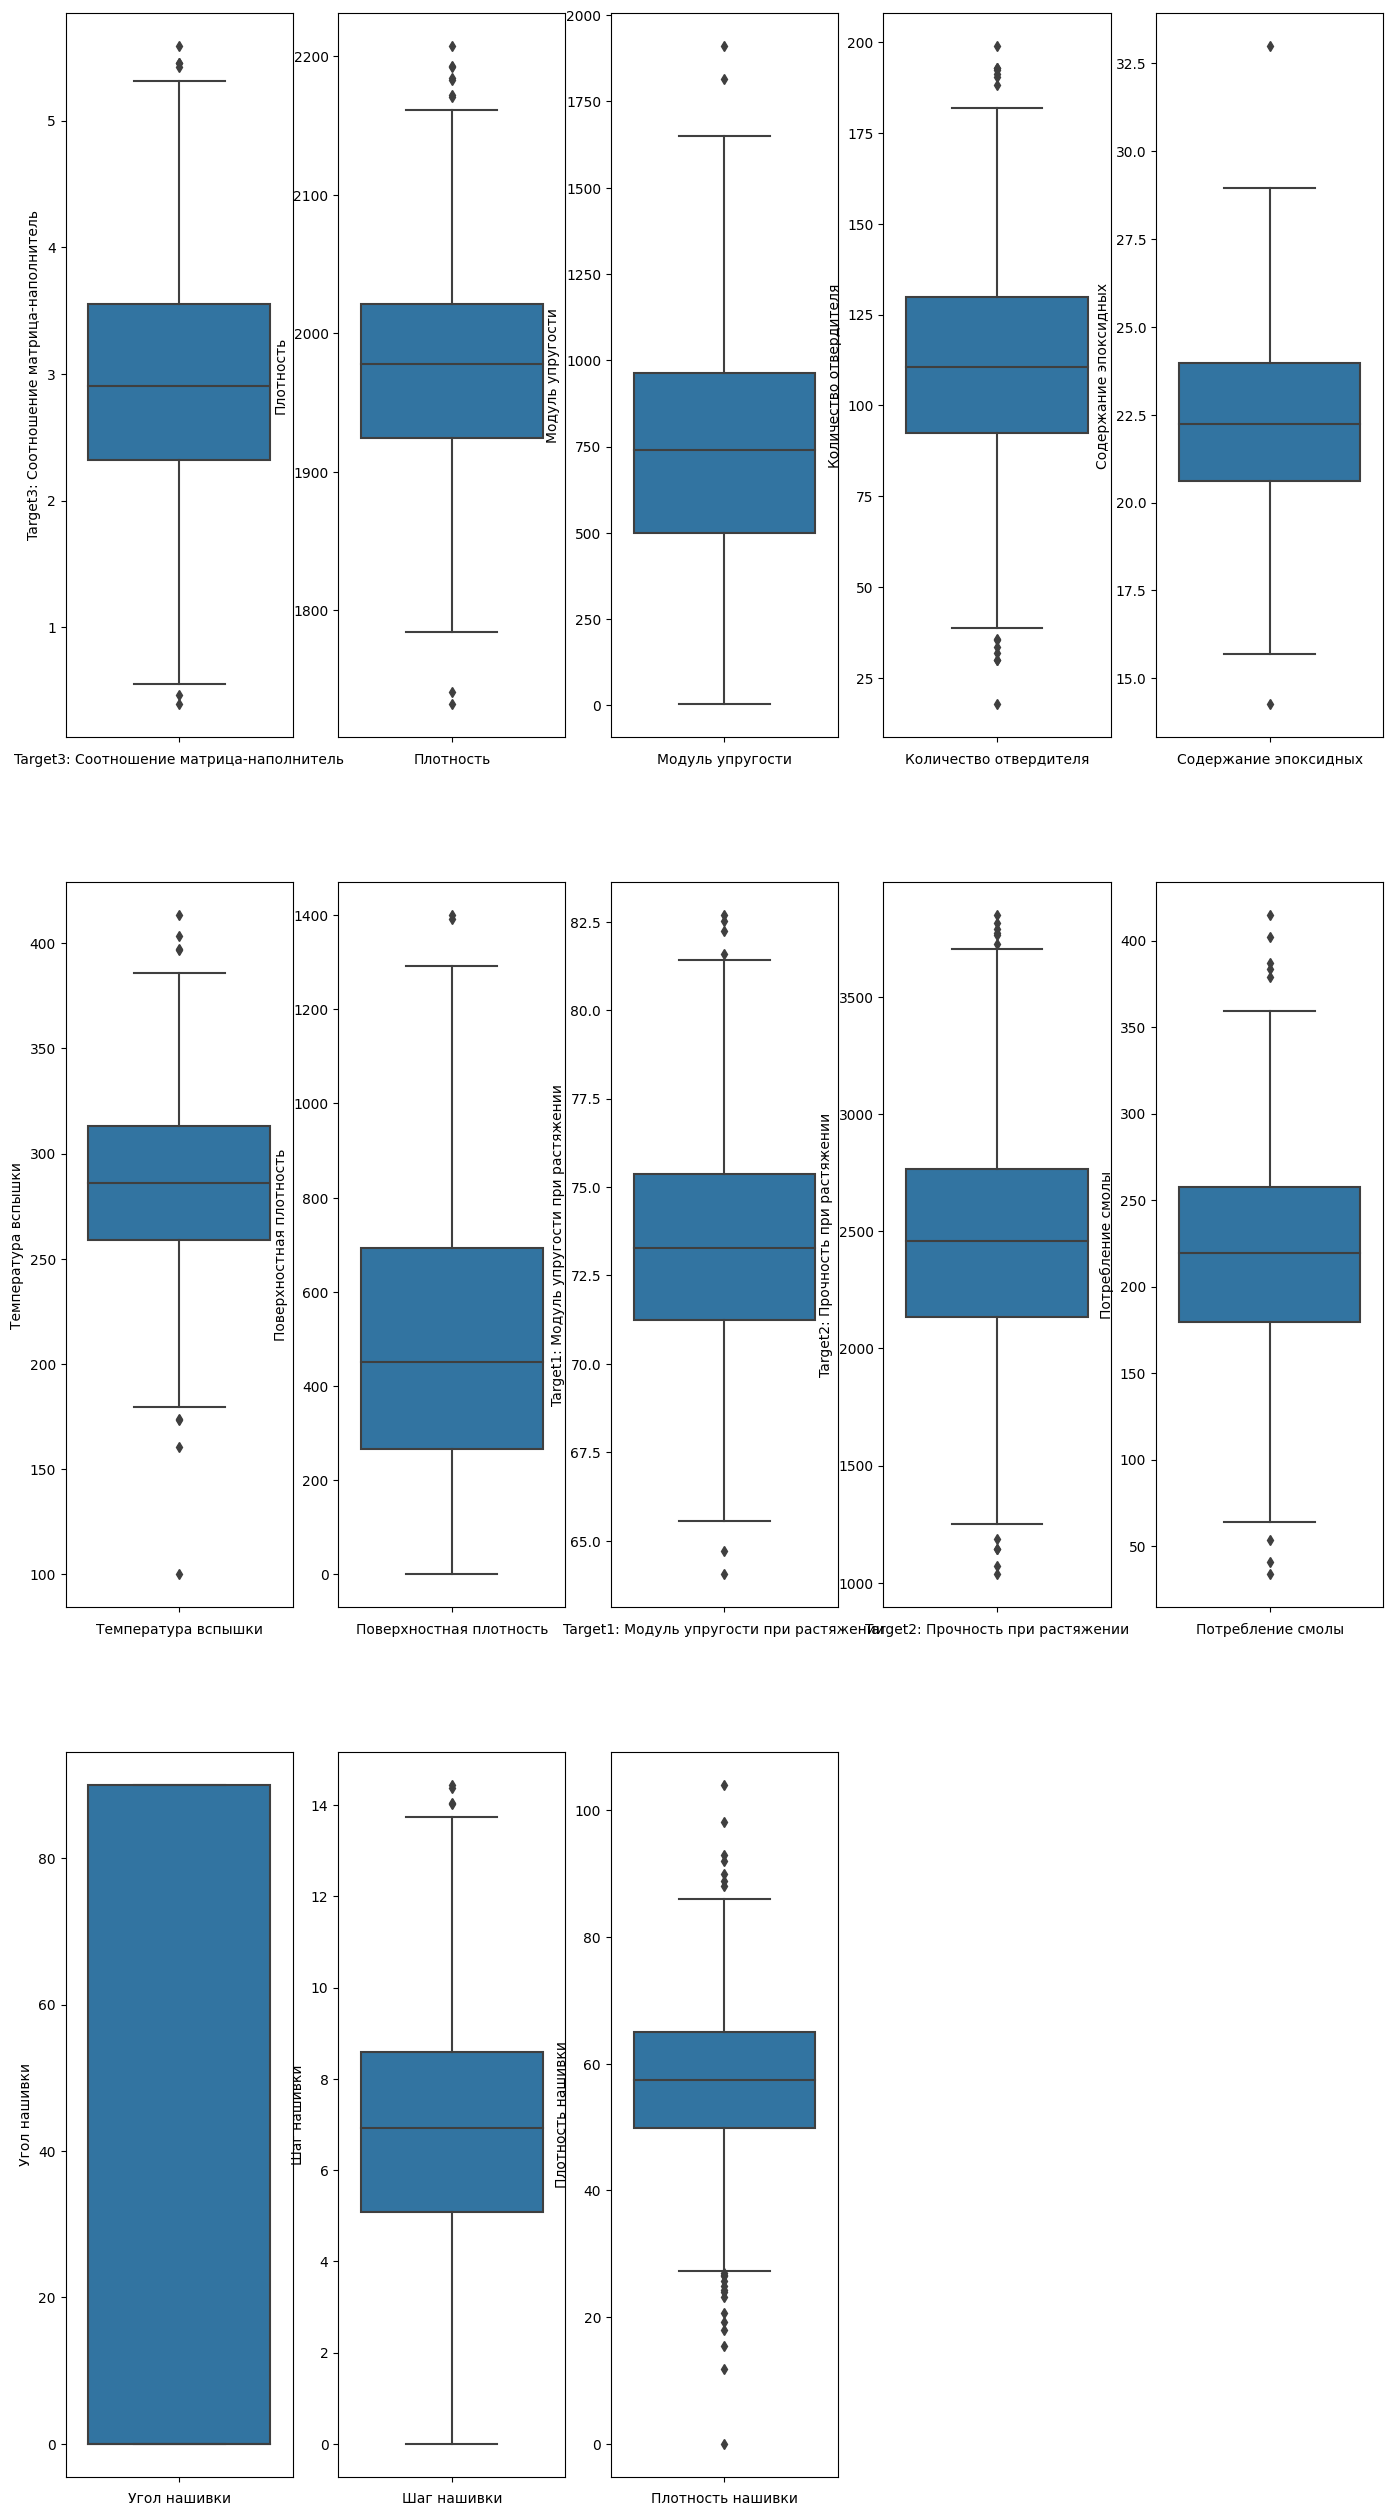

In [65]:
n = 1  # счетчик
s = 3  # строки
c = 5  # столбцы


fig = plt.figure(figsize=(17, 32))

for i in df.columns:
    plt.subplot(s, c, n)
    plt.xlabel(i)
    sns.boxplot(y = df[i])
    n = n + 1
   
plt.show()

# Удаление выбросов

In [85]:
# Метод Z-оценки:
df_drop = df[(np.abs(stats.zscore(df)) <= 3).all(axis=1)]
df_drop

Target3: Соотношение матрица-наполнитель    Плотность  Модуль упругости  \
1                                     1.857143  2030.000000        738.736842   
3                                     1.857143  2030.000000        738.736842   
4                                     2.771331  2030.000000        753.000000   
5                                     2.767918  2000.000000        748.000000   
6                                     2.569620  1910.000000        807.000000   
...                                        ...          ...               ...   
1018                                  2.271346  1952.087902        912.855545   
1019                                  3.444022  2050.089171        444.732634   
1020                                  3.280604  1972.372865        416.836524   
1021                                  3.705351  2066.799773        741.475517   
1022                                  3.808020  1890.413468        417.316232   

      Количество отвердителя  Содержание эпоксидных  Температура вспышки  \
1                  50.000000              23.750000           284.615385   
3                 129.000000              21.250000           300.000000   
4                 111.860000              22.267857           284.615385   
5                 111.860000              22.267857           284.615385   
6                 111.860000              22.267857           284.615385   
...                      ...                    ...                  ...   
1018               86.992183              20.123249           324.774576   
1019              145.981978              19.599769           254.215401   
1020              110.533477              23.957502           248.423047   
1021              141.397963              19.246945           275.779840   
1022              129.183416              27.474763           300.952708   

      Поверхностная плотность  Target1: Модуль упругости при растяжении  \
1                  210.000000                                 70.000000   
3                  210.000000                                 70.000000   
4                  210.000000                                 70.000000   
5                  210.000000                                 70.000000   
6                  210.000000                                 70.000000   
...                       ...                                       ...   
1018               209.198700                                 73.090961   
1019               350.660830                                 72.920827   
1020               740.142791                                 74.734344   
1021               641.468152                                 74.042708   
1022               758.747882                                 74.309704   

      Target2: Прочность при растяжении  Потребление смолы  Угол нашивки  \
1                           3000.000000         220.000000             0   
3                           3000.000000         220.000000             0   
4                           3000.000000         220.000000             0   
5                           3000.000000         220.000000             0   
6                           3000.000000         220.000000             0   
...                                 ...                ...           ...   
1018                        2387.292495         125.007669            90   
1019                        2360.392784         117.730099            90   
1020                        2662.906040         236.606764            90   
1021                        2071.715856         197.126067            90   
1022                        2856.328932         194.754342            90   

      Шаг нашивки  Плотность нашивки  
1        4.000000          60.000000  
3        5.000000          47.000000  
4        5.000000          57.000000  
5        5.000000          60.000000  
6        5.000000          70.000000  
...           ...                ...  
1018     9.076380          47.019

# "Ящик с усами" после удаления выбросов

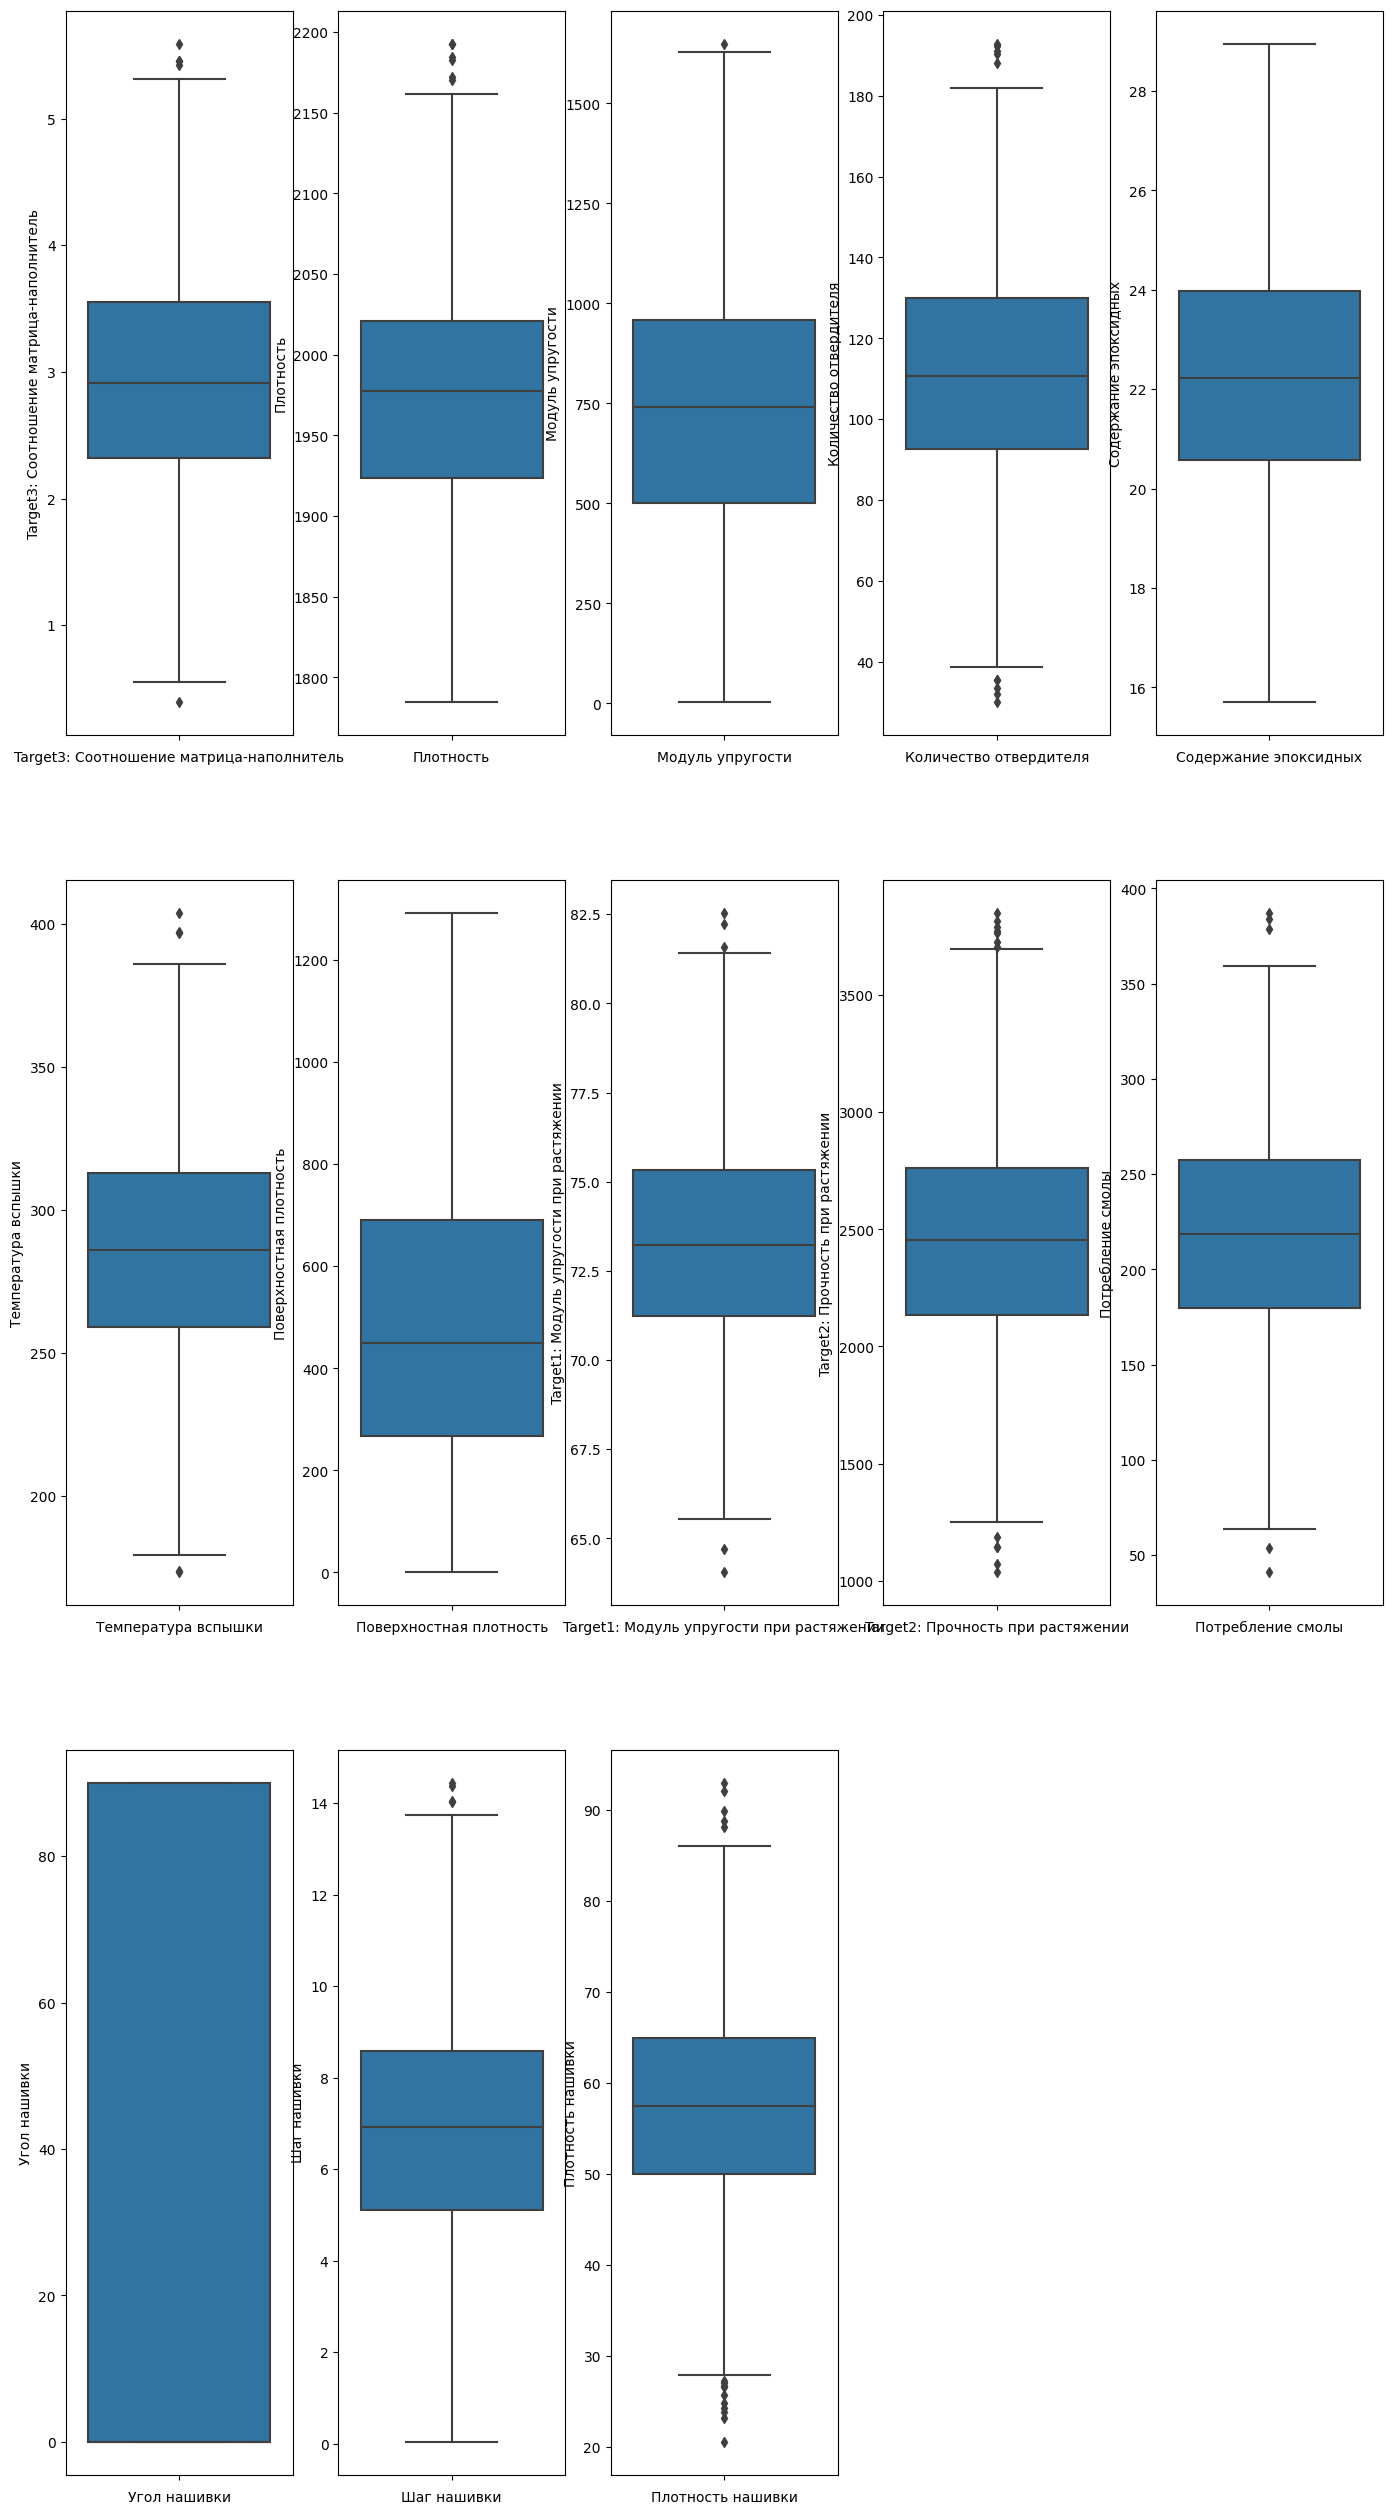

In [86]:
n = 1  # счетчик
s = 3  # строки
c = 5  # столбцы


fig = plt.figure(figsize=(17, 32))

for i in df_drop.columns:
    plt.subplot(s, c, n)
    plt.xlabel(i)
    sns.boxplot(y = df_drop[i])
    n = n + 1
   
plt.show()

# Оценка плотности ядра

<AxesSubplot: ylabel='Density'>

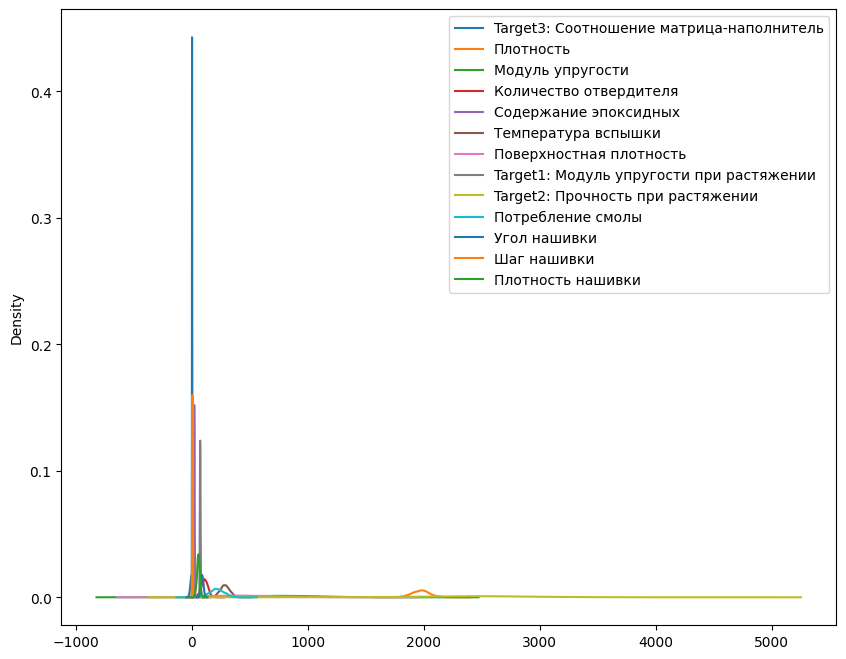

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))
df_drop.plot(kind='kde', ax=ax)

Признаки находятся в разных диапазонах и распределении, необходимо провести нормализацию.

# Нормализация

In [89]:
scaler = preprocessing.MinMaxScaler()
names = df_drop.columns
d = scaler.fit_transform(df_drop)
df_drop_norm = pd.DataFrame(d, columns=names).round(2)
df_drop_norm.head()

Target3: Соотношение матрица-наполнитель  Плотность  Модуль упругости  \
0                                      0.28       0.60              0.45   
1                                      0.28       0.60              0.45   
2                                      0.46       0.60              0.46   
3                                      0.46       0.53              0.45   
4                                      0.42       0.31              0.49   

   Количество отвердителя  Содержание эпоксидных  Температура вспышки  \
0                    0.12                   0.61                 0.48   
1                    0.61                   0.42                 0.55   
2                    0.50                   0.50                 0.48   
3                    0.50                   0.50                 0.48   
4                    0.50                   0.50                 0.48   

   Поверхностная плотность  Target1: Модуль упругости при растяжении  \
0                     0.16                                      0.32   
1                     0.16                                      0.32   
2                     0.16                                      0.32   
3                     0.16                                      0.32   
4                     0.16                                      0.32   

   Target2: Прочность при растяжении  Потребление смолы  Угол нашивки  \
0                                0.7               0.52           0.0   
1                                0.7               0.52           0.0   
2                                0.7               0.52           0.0   
3                                0.7               0.52           0.0   
4                                0.7               0.52           0.0   

   Шаг нашивки  Плотность нашивки  
0         0.28               0.54  
1         0.34               0.37  
2         0.34               0.50  
3         0.34               0.54  
4         0.34               0.68

# Оценка плотности ядра после нормализации

<AxesSubplot: ylabel='Density'>

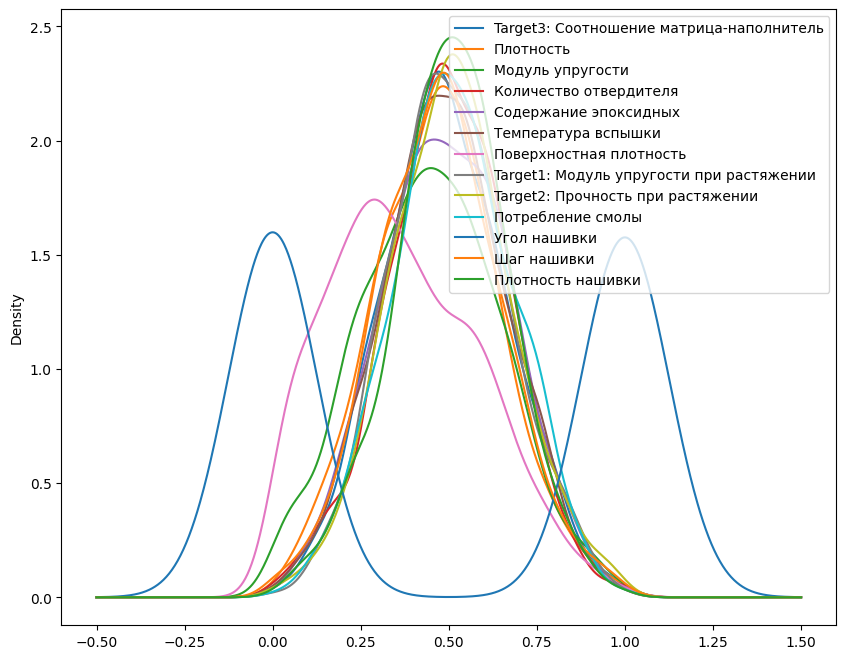

In [90]:
fig, ax = plt.subplots(figsize=(10, 8))
df_drop_norm.plot(kind='kde', ax=ax)

## Оценим ящик с усами после нормализации

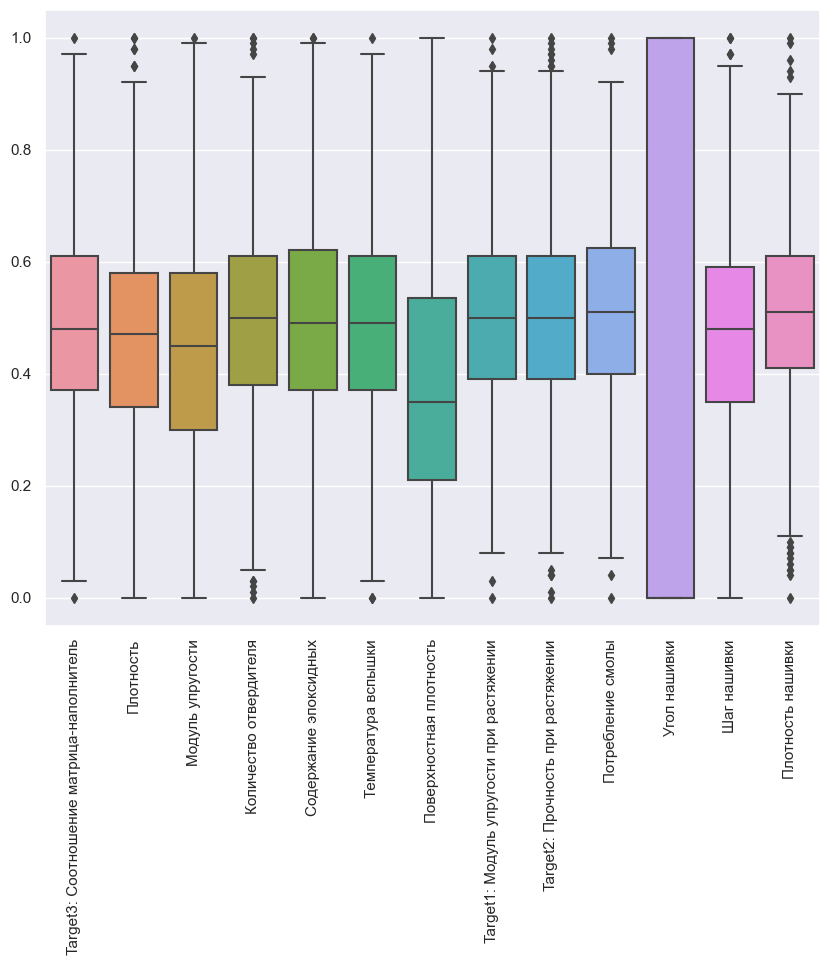

In [93]:
#min_max_scaler = preprocessing.MinMaxScaler()
#df_drop_norm = pd.DataFrame(min_max_scaler.fit_transform(join_dataFrame_drop),
    #columns = join_dataFrame_drop.columns,
    #index = join_dataFrame_drop.index)
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.boxplot(data=df_drop_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Средние значения примерно в одном диапазоне.. Самое большое количество выбросов в ..

In [94]:
## Модели для прогноза модуля упругости при растяжении (Target1) и прочности при растяжении (Target2).

## Разделение данных на Х и у

In [97]:
df_split = df_drop_norm.copy()
print(df_split.shape)

(999, 13)


In [100]:
y1 = df_split['Target1: Модуль упругости при растяжении']
y2 = df_split['Target2: Прочность при растяжении']
y3 = df_split['Target3: Соотношение матрица-наполнитель']

X1 = df_split.drop(['Target1: Модуль упругости при растяжении'], axis = 1)
X2 = df_split.drop(['Target2: Прочность при растяжении'], axis = 1)
X3 = df_split.drop(['Target3: Соотношение матрица-наполнитель'], axis = 1)

In [112]:
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)

(999, 12) (999,)
(999, 12) (999,)
(999, 12) (999,)
